In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
import zipfile
import os

# Define the zip file path
zip_path = "/content/lahman_1871-2023db_csv.zip"
extract_path = "/content/lahman_1871-2023db_csv/lahman_1871-2023db_csv/lahman_1871-2023db_csv/lahman_1871-2023db_csv/lahman_1871-2023db_csv"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extracted CSV files to: {extract_path}")


Extracted CSV files to: /content/lahman_1871-2023db_csv/lahman_1871-2023db_csv/lahman_1871-2023db_csv/lahman_1871-2023db_csv/lahman_1871-2023db_csv


In [ ]:
# Define the SQLite database path
db_path = "/content/lahman.sqlite"

# Create a connection to SQLite
conn = sqlite3.connect(db_path)

# Loop through extracted CSV files and add them to the database
for file_name in os.listdir(extract_path):
    if file_name.endswith(".csv"):
        table_name = os.path.splitext(file_name)[0]
        file_path = os.path.join(extract_path, file_name)

        df = pd.read_csv(file_path)

        # Store the DataFrame in the database
        df.to_sql(table_name, conn, if_exists="replace", index=False)
        print(f"Loaded {table_name} into the database.")

conn.close()

Loaded BattingPost into the database.
Loaded Appearances into the database.
Loaded AwardsSharePlayers into the database.
Loaded TeamsHalf into the database.
Loaded Fielding into the database.
Loaded FieldingPost into the database.
Loaded AwardsShareManagers into the database.
Loaded PitchingPost into the database.
Loaded Batting into the database.
Loaded ManagersHalf into the database.


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 232116: invalid continuation byte

In [ ]:
for file_name in os.listdir(extract_path):
    if file_name.endswith(".csv"):
        table_name = os.path.splitext(file_name)[0]
        file_path = os.path.join(extract_path, file_name)

        try:
            # Read the CSV into a Pandas DataFrame
            df = pd.read_csv(file_path, encoding="utf-8", on_bad_lines="skip")  # Skip bad lines
        except UnicodeDecodeError:
            print(f"UnicodeDecodeError for {file_name}. Trying ISO-8859-1 encoding.")
            try:
                df = pd.read_csv(file_path, encoding="ISO-8859-1", on_bad_lines="skip")
            except Exception as e:
                print(f"Failed to load {file_name}: {e}")
                continue

        # Store the DataFrame in the database
        df.to_sql(table_name, conn, if_exists="replace", index=False)
        print(f"Loaded {table_name} into the database.")


Loaded BattingPost into the database.
Loaded Appearances into the database.
Loaded AwardsSharePlayers into the database.
Loaded TeamsHalf into the database.
Loaded Fielding into the database.
Loaded FieldingPost into the database.
Loaded AwardsShareManagers into the database.
Loaded PitchingPost into the database.
Loaded Batting into the database.
Loaded ManagersHalf into the database.
UnicodeDecodeError for People.csv. Trying ISO-8859-1 encoding.
Loaded People into the database.
Loaded AwardsManagers into the database.
Loaded TeamsFranchises into the database.
Loaded Teams into the database.
Loaded FieldingOFsplit into the database.
Loaded CollegePlaying into the database.
Loaded Salaries into the database.
Loaded AllstarFull into the database.
Loaded HomeGames into the database.
Loaded Managers into the database.
Loaded AwardsPlayers into the database.
Loaded Pitching into the database.
Loaded HallOfFame into the database.
Loaded Schools into the database.
Loaded FieldingOF into the 

In [ ]:
import os

# Check if the database file exists
if os.path.exists("/content/lahman.sqlite"):
    print("Database exists!")
else:
    print("Database does not exist.")

Database exists!


In [ ]:
import os

# Check if the CSV file exists
file_path = '/content/lahman.sqlite'
print("Does the file exist?", os.path.exists(file_path))

Does the file exist? True


In [ ]:
import sqlite3

conn = sqlite3.connect('/content/lahman.sqlite')

cursor = conn.cursor()

# List all the tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print all table names
print(f"Tables in the database: {tables}")

# Query a specific table (example: People table)
cursor.execute("SELECT * FROM People LIMIT 10;")
rows = cursor.fetchall()

# Print the first few rows of the People table
for row in rows:
    print(row)

conn.close()


Tables in the database: [('BattingPost',), ('Appearances',), ('AwardsSharePlayers',), ('TeamsHalf',), ('Fielding',), ('FieldingPost',), ('AwardsShareManagers',), ('PitchingPost',), ('Batting',), ('ManagersHalf',), ('People',), ('AwardsManagers',), ('TeamsFranchises',), ('Teams',), ('FieldingOFsplit',), ('CollegePlaying',), ('Salaries',), ('AllstarFull',), ('HomeGames',), ('Managers',), ('AwardsPlayers',), ('Pitching',), ('HallOfFame',), ('Schools',), ('FieldingOF',), ('Parks',), ('SeriesPost',)]
(1, 'aardsda01', 1981.0, 12.0, 27.0, 'Denver', 'USA', 'CO', None, None, None, None, None, None, 'David', 'Aardsma', 'David Allan', 215.0, 75.0, 'R', 'R', '2004-04-06', 'aardsda01', '2015-08-23', 'aardd001')
(2, 'aaronha01', 1934.0, 2.0, 5.0, 'Mobile', 'USA', 'AL', 2021.0, 1.0, 22.0, 'USA', 'GA', 'Atlanta', 'Hank', 'Aaron', 'Henry Louis', 180.0, 72.0, 'R', 'R', '1954-04-13', 'aaronha01', '1976-10-03', 'aaroh101')
(3, 'aaronto01', 1939.0, 8.0, 5.0, 'Mobile', 'USA', 'AL', 1984.0, 8.0, 16.0, 'USA',

In [ ]:
import sqlite3
import pandas as pd

db_file_path = '/content/lahman.sqlite'

conn = sqlite3.connect(db_file_path)

# Query to fetch data from the 'People' table
query = "SELECT * FROM People LIMIT 10;"
df = pd.read_sql_query(query, conn)

print(df.head())



   ID   playerID  birthYear  birthMonth  birthDay   birthCity birthCountry  \
0   1  aardsda01     1981.0        12.0      27.0      Denver          USA   
1   2  aaronha01     1934.0         2.0       5.0      Mobile          USA   
2   3  aaronto01     1939.0         8.0       5.0      Mobile          USA   
3   4   aasedo01     1954.0         9.0       8.0      Orange          USA   
4   5   abadan01     1972.0         8.0      25.0  Palm Beach          USA   

  birthState  deathYear  deathMonth  ...  nameLast       nameGiven weight  \
0         CO        NaN         NaN  ...   Aardsma     David Allan  215.0   
1         AL     2021.0         1.0  ...     Aaron     Henry Louis  180.0   
2         AL     1984.0         8.0  ...     Aaron      Tommie Lee  190.0   
3         CA        NaN         NaN  ...      Aase  Donald William  190.0   
4         FL        NaN         NaN  ...      Abad   Fausto Andres  184.0   

  height bats throws       debut    bbrefID   finalGame   retroID  


In [ ]:
# Check a few rows from the People table
query_people = "SELECT * FROM People LIMIT 5;"
df_people = pd.read_sql_query(query_people, conn)
print(df_people.head())

# Check a few rows from the Batting table
query_batting = "SELECT * FROM Batting LIMIT 5;"
df_batting = pd.read_sql_query(query_batting, conn)
print(df_batting.head())

   ID   playerID  birthYear  birthMonth  birthDay   birthCity birthCountry  \
0   1  aardsda01     1981.0        12.0      27.0      Denver          USA   
1   2  aaronha01     1934.0         2.0       5.0      Mobile          USA   
2   3  aaronto01     1939.0         8.0       5.0      Mobile          USA   
3   4   aasedo01     1954.0         9.0       8.0      Orange          USA   
4   5   abadan01     1972.0         8.0      25.0  Palm Beach          USA   

  birthState  deathYear  deathMonth  ...  nameLast       nameGiven weight  \
0         CO        NaN         NaN  ...   Aardsma     David Allan  215.0   
1         AL     2021.0         1.0  ...     Aaron     Henry Louis  180.0   
2         AL     1984.0         8.0  ...     Aaron      Tommie Lee  190.0   
3         CA        NaN         NaN  ...      Aase  Donald William  190.0   
4         FL        NaN         NaN  ...      Abad   Fausto Andres  184.0   

  height bats throws       debut    bbrefID   finalGame   retroID  


In [ ]:
conn = sqlite3.connect(db_path)

# Query active players
query = """
SELECT
    p.playerID,
    p.nameFirst,
    p.nameLast,
    p.nameGiven,
    p.birthYear,
    p.birthMonth,
    p.birthDay,
    p.birthCountry,
    p.birthState,
    p.birthCity,
    p.weight,
    p.height,
    p.bats,
    p.throws,
    b.*
FROM People p
JOIN Batting b ON p.playerID = b.playerID
WHERE b.G >= 50 AND (p.finalGame IS NULL OR p.finalGame = "########")
"""

# Execute the query and load results into a DataFrame
df = pd.read_sql_query(query, conn)
print(df.head())

# It shows empty DataFrame because there are no players that meet the criteria.




Empty DataFrame
Columns: [playerID, nameFirst, nameLast, nameGiven, birthYear, birthMonth, birthDay, birthCountry, birthState, birthCity, weight, height, bats, throws, playerID, yearID, stint, teamID, lgID, G, G_batting, AB, R, H, 2B, 3B, HR, RBI, SB, CS, BB, SO, IBB, HBP, SH, SF, GIDP, G_old]
Index: []

[0 rows x 38 columns]


In [ ]:
import sqlite3
import pandas as pd
from datetime import datetime

conn = sqlite3.connect('/content/lahman.sqlite')

# Get current date in the required format (YYYY-MM-DD)
current_date = datetime.today().strftime('%Y-%m-%d')

# Query for active players who have played at least 50 games
query = """
SELECT p.playerID, p.birthYear, p.birthMonth, p.birthDay, p.birthCity, p.birthCountry,
       p.nameLast, p.nameGiven, p.weight, p.throws, p.bats, p.finalGame,
       b.G
FROM People p
JOIN Batting b ON p.playerID = b.playerID
WHERE (p.finalGame IS NULL OR p.finalGame > ?)  -- Players without final game date are still active
AND b.G >= 50;  -- Players who have played at least 50 games
"""

# Execute the query with the current date to filter active players
df = pd.read_sql_query(query, conn, params=(current_date,))

print(df.head())




Empty DataFrame
Columns: [playerID, birthYear, birthMonth, birthDay, birthCity, birthCountry, nameLast, nameGiven, weight, throws, bats, finalGame, G]
Index: []


In [ ]:
# Query to check for players with no finalGame or future finalGame
query_check_active = """
SELECT p.playerID, p.nameLast, p.nameGiven, p.finalGame
FROM People p
WHERE p.finalGame IS NULL OR p.finalGame > ?;
"""

df_active_players = pd.read_sql_query(query_check_active, conn, params=(current_date,))

print(df_active_players.head())

    playerID  nameLast         nameGiven finalGame
0   actama99      Acta      Manuel Elias      None
1  adairbi99     Adair      Marion Danne      None
2  armoubi99    Armour  William Reginald      None
3  bancrfr99  Bancroft      Frank Carter      None
4  barlial99   Barlick     Albert Joseph      None


In [ ]:
# Query to check for players who have played at least 50 games
query_check_games = """
SELECT playerID, SUM(G) AS total_games
FROM Batting
GROUP BY playerID
HAVING total_games >= 50;
"""

df_players_50_games = pd.read_sql_query(query_check_games, conn)

print(df_players_50_games.head())

    playerID  total_games
0  aardsda01          331
1  aaronha01         3298
2  aaronto01          437
3   aasedo01          448
4   abadfe01          406


In [ ]:
# Query to check active players with at least 50 games
query_check_join = """
SELECT p.playerID, p.nameLast, p.nameGiven, p.finalGame, b.G
FROM People p
JOIN Batting b ON p.playerID = b.playerID
WHERE (p.finalGame IS NULL OR p.finalGame > ?)
AND b.G >= 50;
"""

df_check_join = pd.read_sql_query(query_check_join, conn, params=(current_date,))

print(df_check_join.head())


Empty DataFrame
Columns: [playerID, nameLast, nameGiven, finalGame, G]
Index: []


In [ ]:
# Check for duplicated columns and display the first few rows to check
print(df.columns)
print(df.head())

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCity',
       'birthCountry', 'nameLast', 'nameGiven', 'weight', 'throws', 'bats',
       'finalGame', 'G'],
      dtype='object')
Empty DataFrame
Columns: [playerID, birthYear, birthMonth, birthDay, birthCity, birthCountry, nameLast, nameGiven, weight, throws, bats, finalGame, G]
Index: []


In [ ]:
# Remove duplicated 'playerID' columns
df = df.loc[:, ~df.columns.duplicated()]

# Check columns after removing duplicates
print("Columns after removing duplicates:", df.columns)

print(df.head())

Columns after removing duplicates: Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCity',
       'birthCountry', 'nameLast', 'nameGiven', 'weight', 'throws', 'bats',
       'finalGame', 'G'],
      dtype='object')
Empty DataFrame
Columns: [playerID, birthYear, birthMonth, birthDay, birthCity, birthCountry, nameLast, nameGiven, weight, throws, bats, finalGame, G]
Index: []


In [ ]:
#Check for Players with Games Played (G >= 50)

query_check_games = """
SELECT COUNT(*)
FROM Batting
WHERE G >= 50;
"""
result = pd.read_sql_query(query_check_games, conn)
print(f"Players with 50+ games: {result.iloc[0, 0]}")

Players with 50+ games: 42330


In [ ]:
#Check for Active Players

query_check_active_players = """
SELECT COUNT(*)
FROM People
WHERE finalGame IS NULL OR finalGame = "";
"""
result_active = pd.read_sql_query(query_check_active_players, conn)
print(f"Active players: {result_active.iloc[0, 0]}")

Active players: 286


In [ ]:
#Check Data Types and Field Matching

query_columns = "PRAGMA table_info(People);"
df_columns_people = pd.read_sql_query(query_columns, conn)
print(df_columns_people)

query_columns_batting = "PRAGMA table_info(Batting);"
df_columns_batting = pd.read_sql_query(query_columns_batting, conn)
print(df_columns_batting)

    cid          name     type  notnull dflt_value  pk
0     0            ID  INTEGER        0       None   0
1     1      playerID     TEXT        0       None   0
2     2     birthYear     REAL        0       None   0
3     3    birthMonth     REAL        0       None   0
4     4      birthDay     REAL        0       None   0
5     5     birthCity     TEXT        0       None   0
6     6  birthCountry     TEXT        0       None   0
7     7    birthState     TEXT        0       None   0
8     8     deathYear     REAL        0       None   0
9     9    deathMonth     REAL        0       None   0
10   10      deathDay     REAL        0       None   0
11   11  deathCountry     TEXT        0       None   0
12   12    deathState     TEXT        0       None   0
13   13     deathCity     TEXT        0       None   0
14   14     nameFirst     TEXT        0       None   0
15   15      nameLast     TEXT        0       None   0
16   16     nameGiven     TEXT        0       None   0
17   17   

In [ ]:
#Player with more than 50games - ID, first and last name

query_simplified = """
SELECT
    p.playerID,
    p.nameFirst,
    p.nameLast
FROM People p
JOIN Batting b ON p.playerID = b.playerID
WHERE b.G >= 50;
"""
df_simplified = pd.read_sql_query(query_simplified, conn)
print(df_simplified.head())

    playerID nameFirst nameLast
0  aardsda01     David  Aardsma
1  aardsda01     David  Aardsma
2  aaronha01      Hank    Aaron
3  aaronha01      Hank    Aaron
4  aaronha01      Hank    Aaron


In [ ]:
#Remove Duplicate Player Records:

query_simplified_unique = """
SELECT DISTINCT
    p.playerID,
    p.nameFirst,
    p.nameLast
FROM People p
JOIN Batting b ON p.playerID = b.playerID
WHERE b.G >= 50;
"""
df_simplified_unique = pd.read_sql_query(query_simplified_unique, conn)
print(df_simplified_unique.head())

    playerID nameFirst nameLast
0  aardsda01     David  Aardsma
1  aaronha01      Hank    Aaron
2  aaronto01    Tommie    Aaron
3   aasedo01       Don     Aase
4   abadfe01  Fernando     Abad


In [ ]:
# I tried one more time to get resulits with the criteria after investigating

query_check_active_players = """
SELECT DISTINCT
    p.playerID,
    p.nameFirst,
    p.nameLast
FROM People p
JOIN Batting b ON p.playerID = b.playerID
WHERE b.G >= 50 AND (p.finalGame IS NULL OR p.finalGame = "" OR p.finalGame = "########");
"""
df_active_players = pd.read_sql_query(query_check_active_players, conn)
print(df_active_players.head())

Empty DataFrame
Columns: [playerID, nameFirst, nameLast]
Index: []


In [ ]:
#Active Players with Any Batting Data:

query_active_with_batting = """

SELECT DISTINCT
    p.playerID,
    p.nameFirst,
    p.nameLast
FROM People p
JOIN Batting b ON p.playerID = b.playerID
WHERE p.finalGame IS NULL OR p.finalGame = "";
"""
df_active_with_batting = pd.read_sql_query(query_active_with_batting, conn)
print(f"Active players with Batting data: {df_active_with_batting.shape[0]}")

Active players with Batting data: 7


In [ ]:
#Check Active Players with 50+ Games, but No finalGame Condition:

query_50_games_any = """
SELECT DISTINCT
    p.playerID,
    p.nameFirst,
    p.nameLast
FROM People p
JOIN Batting b ON p.playerID = b.playerID
WHERE b.G >= 50;
"""
df_50_games = pd.read_sql_query(query_50_games_any, conn)
print(f"Players with 50+ games: {df_50_games.shape[0]}")

Players with 50+ games: 8318


In [ ]:
query_active_players_combined = """
SELECT DISTINCT
    p.playerID,
    p.nameFirst,
    p.nameLast
FROM People p
LEFT JOIN Batting b ON p.playerID = b.playerID
LEFT JOIN Pitching pt ON p.playerID = pt.playerID
WHERE (b.G >= 50 OR pt.G >= 50)
  AND (p.finalGame IS NULL OR p.finalGame = "");
"""
df_active_combined = pd.read_sql_query(query_active_players_combined, conn)
print(f"Active players with 50+ games (Batting or Pitching): {df_active_combined.shape[0]}")


Active players with 50+ games (Batting or Pitching): 0


In [ ]:
query_check_batting_or_pitching = """
SELECT DISTINCT
    p.playerID,
    p.nameFirst,
    p.nameLast
FROM People p
LEFT JOIN Batting b ON p.playerID = b.playerID
LEFT JOIN Pitching pt ON p.playerID = pt.playerID
WHERE (b.playerID IS NOT NULL OR pt.playerID IS NOT NULL)
  AND (p.finalGame IS NULL OR p.finalGame = "");
"""
df_batting_or_pitching = pd.read_sql_query(query_check_batting_or_pitching, conn)
print(f"Total active players with Batting or Pitching data: {df_batting_or_pitching.shape[0]}")


Total active players with Batting or Pitching data: 7


In [ ]:
 #the number of games played for each of the 7 active players:

query_check_games_played = """
SELECT
    p.playerID,
    p.nameFirst,
    p.nameLast,
    SUM(b.G) AS games_batting,
    SUM(pt.G) AS games_pitching
FROM People p
LEFT JOIN Batting b ON p.playerID = b.playerID
LEFT JOIN Pitching pt ON p.playerID = pt.playerID
WHERE (b.playerID IS NOT NULL OR pt.playerID IS NOT NULL)
  AND (p.finalGame IS NULL OR p.finalGame = "")
GROUP BY p.playerID
"""
df_games_played = pd.read_sql_query(query_check_games_played, conn)
print(df_games_played)

#Conclusion:
#There are 7 active players with Batting or Pitching data.
#These players have less than 50 games played, which is why no players match the 50+ games condition.

    playerID nameFirst  nameLast  games_batting  games_pitching
0  crossjo01       Joe     Cross              1             NaN
1  gilgahu01      Hugh    Gilgan              2             NaN
2  hyndmji01   William   Hyndman              1             1.0
3  mckenfr01     Frank   McKenna              1             NaN
4  stineha01   William     Stein              1             1.0
5  sulliwi01   William  Sullivan              1             1.0
6  zeihehe01     Henry    Zeiher              6             NaN


In [ ]:
# Check for missing values in the DataFrame before dropping any rows
missing_data = df.isnull().sum()
print("Missing Data Summary:")
print(missing_data)

Missing Data Summary:
playerID        0
birthCountry    0
birthState      0
birthCity       0
weight          0
height          0
bats            0
throws          0
playerID        0
yearID          0
stint           0
teamID          0
lgID            0
G               0
G_batting       0
AB              0
R               0
H               0
2B              0
3B              0
HR              0
RBI             0
SB              0
CS              0
BB              0
SO              0
IBB             0
HBP             0
SH              0
SF              0
GIDP            0
G_old           0
age             0
fullName        0
dtype: int64


In [ ]:
import sqlite3
import pandas as pd
from datetime import datetime

conn = sqlite3.connect('/content/lahman.sqlite')

# Read the 'People' table into a DataFrame
df = pd.read_sql("SELECT * FROM People", conn)

# 1. Add a Calculated Column for Age
# Calculate the player's age based on their birthYear and birthMonth.

# Step 1: Add a calculated column for the player's age
current_year = datetime.now().year
current_month = datetime.now().month

# Function to calculate the player's age
def calculate_age(row):
    # Check if the player has a death year, if so, use it for age calculation
    death_year = row['deathYear'] if pd.notna(row['deathYear']) else current_year
    death_month = row['deathMonth'] if pd.notna(row['deathMonth']) else current_month

    # Calculate the age
    age = death_year - row['birthYear']
    if row['birthMonth'] > death_month:
        age -= 1
    return age

# Apply the function to create the 'age' column
df['age'] = df.apply(calculate_age, axis=1)

#2. Add a Calculated Column for Full Name
# Concatenate the nameFirst and nameLast columns to create a full name for each player.

# Step 2: Add a calculated column for the player's full name
df['fullName'] = df['nameGiven'] + ' ' + df['nameLast']



In [ ]:
# Step 3: Drop birth date and name columns
df.drop(columns=['birthYear', 'birthMonth', 'birthDay', 'nameGiven', 'nameLast'], inplace=True)

# Step 4: Drop rows with missing values
df.dropna(inplace=True)

# Check the first few rows to ensure the changes were applied correctly
print(df.head())

# To save the changes back to the SQLite database:
#df.to_sql('People', conn, if_exists='replace', index=False)

conn.close()

   ID   playerID     birthCity birthCountry birthState  deathYear  deathMonth  \
1   2  aaronha01        Mobile          USA         AL     2021.0         1.0   
2   3  aaronto01        Mobile          USA         AL     1984.0         8.0   
6   7  abadijo01  Philadelphia          USA         PA     1905.0         5.0   
7   8  abbated01       Latrobe          USA         PA     1957.0         1.0   
8   9  abbeybe01         Essex          USA         VT     1962.0         6.0   

   deathDay deathCountry deathState  ... weight height  bats  throws  \
1      22.0          USA         GA  ...  180.0   72.0     R       R   
2      16.0          USA         GA  ...  190.0   75.0     R       R   
6      17.0          USA         NJ  ...  192.0   72.0     R       R   
7       6.0          USA         FL  ...  170.0   71.0     R       R   
8      11.0          USA         VT  ...  175.0   71.0     R       R   

        debut    bbrefID   finalGame   retroID   age                  fullName  

In [ ]:
conn = sqlite3.connect(db_file_path)

# Query to find the active player with the most RBIs from 2015-2018

query_most_rbi = """
SELECT p.playerID, p.nameLast, p.nameGiven, SUM(b.RBI) AS total_RBI
FROM People p
JOIN Batting b ON p.playerID = b.playerID
WHERE (p.finalGame IS NULL OR p.finalGame > ?)
AND b.yearID BETWEEN 2015 AND 2018  -- Restrict to years 2015-2018
GROUP BY p.playerID
ORDER BY total_RBI DESC
LIMIT 1;  -- Get the player with the most RBI
"""

# Execute the query with the current date
df_most_rbi = pd.read_sql_query(query_most_rbi, conn, params=(current_date,))

print(df_most_rbi)

Empty DataFrame
Columns: [playerID, nameLast, nameGiven, total_RBI]
Index: []


In [ ]:
# Query to check for players who played in the years 2015-2018

query_players_2015_2018 = """
SELECT DISTINCT p.playerID, p.nameLast, p.nameGiven
FROM People p
JOIN Batting b ON p.playerID = b.playerID
WHERE b.yearID BETWEEN 2015 AND 2018;
"""

df_players_2015_2018 = pd.read_sql_query(query_players_2015_2018, conn)

print(df_players_2015_2018)

       playerID   nameLast         nameGiven
0     aardsda01    Aardsma       David Allan
1      abadfe01       Abad  Fernando Antonio
2     abreujo02      Abreu       Jose Dariel
3     achteaj01     Achter       Adam Joseph
4     ackledu01     Ackley    Dustin Michael
...         ...        ...               ...
2205  zimmery01  Zimmerman      Ryan Wallace
2206   zitoba01       Zito     Barry William
2207  zobribe01    Zobrist   Benjamin Thomas
2208  zuninmi01     Zunino   Michael Accorsi
2209   zychto01       Zych     Anthony Aaron

[2210 rows x 3 columns]


In [ ]:
# Query to check finalGame dates for players who played between 2015-2018

query_final_game_check_2015_2018 = """
SELECT p.playerID, p.nameLast, p.nameGiven, p.finalGame
FROM People p
JOIN Batting b ON p.playerID = b.playerID
WHERE b.yearID BETWEEN 2015 AND 2018;
"""

df_final_game_check_2015_2018 = pd.read_sql_query(query_final_game_check_2015_2018, conn)

print(df_final_game_check_2015_2018)

       playerID nameLast         nameGiven   finalGame
0     aardsda01  Aardsma       David Allan  2015-08-23
1      abadfe01     Abad  Fernando Antonio  2021-10-01
2      abadfe01     Abad  Fernando Antonio  2021-10-01
3      abadfe01     Abad  Fernando Antonio  2021-10-01
4      abadfe01     Abad  Fernando Antonio  2021-10-01
...         ...      ...               ...         ...
5993  zuninmi01   Zunino   Michael Accorsi  2022-06-09
5994  zuninmi01   Zunino   Michael Accorsi  2022-06-09
5995   zychto01     Zych     Anthony Aaron  2017-08-19
5996   zychto01     Zych     Anthony Aaron  2017-08-19
5997   zychto01     Zych     Anthony Aaron  2017-08-19

[5998 rows x 4 columns]


In [ ]:
# Query to check RBI data for players who played in 2015-2018

query_rbi_check_2015_2018 = """
SELECT b.playerID, b.yearID, b.RBI
FROM Batting b
WHERE b.yearID BETWEEN 2015 AND 2018
ORDER BY b.RBI DESC
LIMIT 10;
"""

df_rbi_check_2015_2018 = pd.read_sql_query(query_rbi_check_2015_2018, conn)

print(df_rbi_check_2015_2018)

    playerID  yearID    RBI
0  arenano01    2016  133.0
1  stantmi03    2017  132.0
2  arenano01    2015  130.0
3  arenano01    2017  130.0
4  martijd02    2018  130.0
5  encared01    2016  127.0
6  ortizda01    2016  127.0
7  ozunama01    2017  124.0
8  daviskh01    2018  123.0
9  donaljo02    2015  123.0


In [ ]:
# Query to check how many active players are in the database (finalGame is NULL or in the future)

query_active_players = """
SELECT p.playerID, p.nameLast, p.nameGiven, p.finalGame
FROM People p
WHERE p.finalGame IS NULL OR p.finalGame > ?
LIMIT 10;
"""

df_active_players = pd.read_sql_query(query_active_players, conn, params=(current_date,))

print(df_active_players)

    playerID   nameLast         nameGiven finalGame
0   actama99       Acta      Manuel Elias      None
1  adairbi99      Adair      Marion Danne      None
2  armoubi99     Armour  William Reginald      None
3  bancrfr99   Bancroft      Frank Carter      None
4  barlial99    Barlick     Albert Joseph      None
5  barroed99     Barrow      Edward Grant      None
6  beaslto99    Beasley     Anthony Wayne      None
7   bellco99       Bell      James Thomas      None
8  bevinte99  Bevington        Terry Paul      None
9  bezdehu99     Bezdek      Hugo Francis      None


In [ ]:
# Check RBI Data Without the finalGame Filter
# Query to check RBI data for all players from 2015-2018

query_rbi_2015_2018 = """
SELECT b.playerID, b.yearID, b.RBI
FROM Batting b
WHERE b.yearID BETWEEN 2015 AND 2018
ORDER BY b.RBI DESC
LIMIT 10;
"""

df_rbi_2015_2018 = pd.read_sql_query(query_rbi_2015_2018, conn)

print(df_rbi_2015_2018)

    playerID  yearID    RBI
0  arenano01    2016  133.0
1  stantmi03    2017  132.0
2  arenano01    2015  130.0
3  arenano01    2017  130.0
4  martijd02    2018  130.0
5  encared01    2016  127.0
6  ortizda01    2016  127.0
7  ozunama01    2017  124.0
8  daviskh01    2018  123.0
9  donaljo02    2015  123.0


In [ ]:
# Query to find playerIDs that are in the People table but not in the Batting table

query_missing_batting_data = """
SELECT p.playerID, p.nameLast, p.nameGiven
FROM People p
WHERE NOT EXISTS (
    SELECT 1 FROM Batting b WHERE b.playerID = p.playerID
)
LIMIT 10;  -- Adjust this to view more players if needed
"""

df_missing_batting_data = pd.read_sql_query(query_missing_batting_data, conn)

print(df_missing_batting_data)

    playerID   nameLast         nameGiven
0   actama99       Acta      Manuel Elias
1  adairbi99      Adair      Marion Danne
2  armoubi99     Armour  William Reginald
3  bancrfr99   Bancroft      Frank Carter
4  barlial99    Barlick     Albert Joseph
5  barroed99     Barrow      Edward Grant
6  beaslto99    Beasley     Anthony Wayne
7   bellco99       Bell      James Thomas
8  bevinte99  Bevington        Terry Paul
9  bezdehu99     Bezdek      Hugo Francis


In [ ]:
# Updated query to filter active players and exclude invalid finalGame data (########)

query_active_players = """
SELECT p.playerID, p.nameLast, p.nameGiven, p.finalGame, b.yearID, b.G, b.RBI
FROM People p
JOIN Batting b ON p.playerID = b.playerID
WHERE (p.finalGame IS NULL OR p.finalGame NOT LIKE '########%' OR p.finalGame > '2024-01-01')  -- Active players
AND b.yearID BETWEEN 2015 AND 2018  -- Batting data from 2015 to 2018
LIMIT 20;  -- Get top 20 results to check
"""

df_active_batting_simple = pd.read_sql_query(query_active_players, conn)

print(df_active_batting_simple)

     playerID nameLast          nameGiven   finalGame  yearID    G    RBI
0   aardsda01  Aardsma        David Allan  2015-08-23    2015   33    0.0
1    abadfe01     Abad   Fernando Antonio  2021-10-01    2015   62    0.0
2    abadfe01     Abad   Fernando Antonio  2021-10-01    2016   18    0.0
3    abadfe01     Abad   Fernando Antonio  2021-10-01    2016   39    0.0
4    abadfe01     Abad   Fernando Antonio  2021-10-01    2017   48    0.0
5   abreujo02    Abreu        Jose Dariel  2022-10-04    2015  154  101.0
6   abreujo02    Abreu        Jose Dariel  2022-10-04    2016  159  100.0
7   abreujo02    Abreu        Jose Dariel  2022-10-04    2017  156  102.0
8   abreujo02    Abreu        Jose Dariel  2022-10-04    2018  128   78.0
9   achteaj01   Achter        Adam Joseph  2016-10-01    2015   11    0.0
10  achteaj01   Achter        Adam Joseph  2016-10-01    2016   27    0.0
11  ackledu01   Ackley     Dustin Michael  2016-05-29    2015   23   11.0
12  ackledu01   Ackley     Dustin Mich

In [ ]:
# Group the data by playerID and sum the RBI values across the 2015-2018 period
total_rbi_per_player = df_active_batting_simple.groupby(['playerID', 'nameLast', 'nameGiven'])['RBI'].sum().reset_index()

# Find the player with the highest total RBI
top_rbi_player = total_rbi_per_player.loc[total_rbi_per_player['RBI'].idxmax()]

print("Player with the most RBI from 2015 to 2018:")
print(top_rbi_player)

Player with the most RBI from 2015 to 2018:
playerID       abreujo02
nameLast           Abreu
nameGiven    Jose Dariel
RBI                381.0
Name: 2, dtype: object


In [ ]:
import sqlite3
import pandas as pd

# Query for double plays grounded into by Albert Pujols in 2016

conn = sqlite3.connect('/content/lahman.sqlite')

query = """
SELECT playerID, yearID, GIDP
FROM Batting
WHERE playerID = 'pujolal01' AND yearID = 2016
"""

df = pd.read_sql(query, conn)

df


,playerID,yearID,GIDP
0,pujolal01,2016,24.0


In [ ]:
# Triples (3B) per year"
query = """
SELECT yearID, SUM(`3B`) AS total_3B
FROM Batting
GROUP BY yearID
ORDER BY yearID;
"""

df_triples_per_year = pd.read_sql(query, conn)

df_triples_per_year.head()

,yearID,total_3B
0,1871,239
1,1872,145
2,1873,211
3,1874,194
4,1875,273


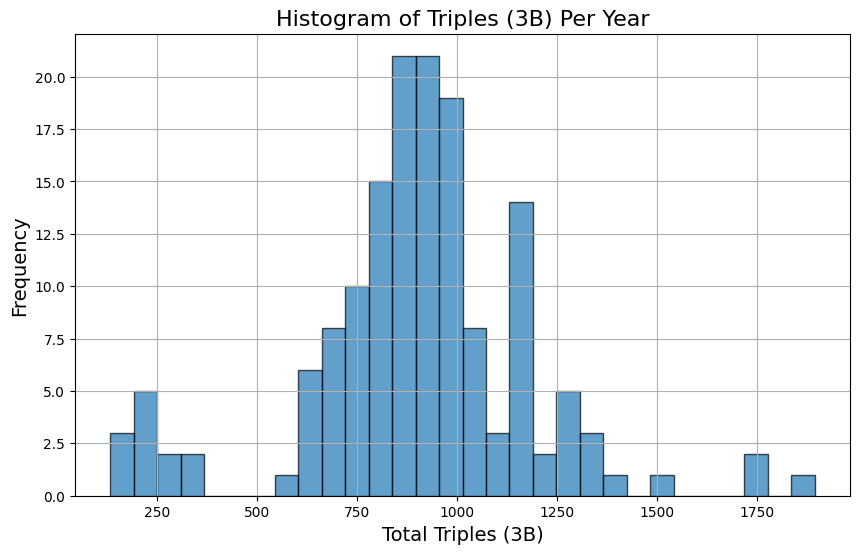

In [ ]:
# Triples (3B) per year"
import matplotlib.pyplot as plt

# Plotting the histogram of triples (3B) per year
plt.figure(figsize=(10, 6))

# Plotting the histogram using the 'total_3B' column
plt.hist(df_triples_per_year['total_3B'], bins=30, edgecolor='black', alpha=0.7)

# Adding titles and labels
plt.title('Histogram of Triples (3B) Per Year', fontsize=16)
plt.xlabel('Total Triples (3B)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(True)

plt.show()


In [ ]:
# Query to get triples (3B) and steals (SB) from the Batting table
query = """
SELECT yearID, playerID, `3B`, SB
FROM Batting
WHERE `3B` IS NOT NULL AND SB IS NOT NULL
"""
df_triples_steals = pd.read_sql_query(query, conn)

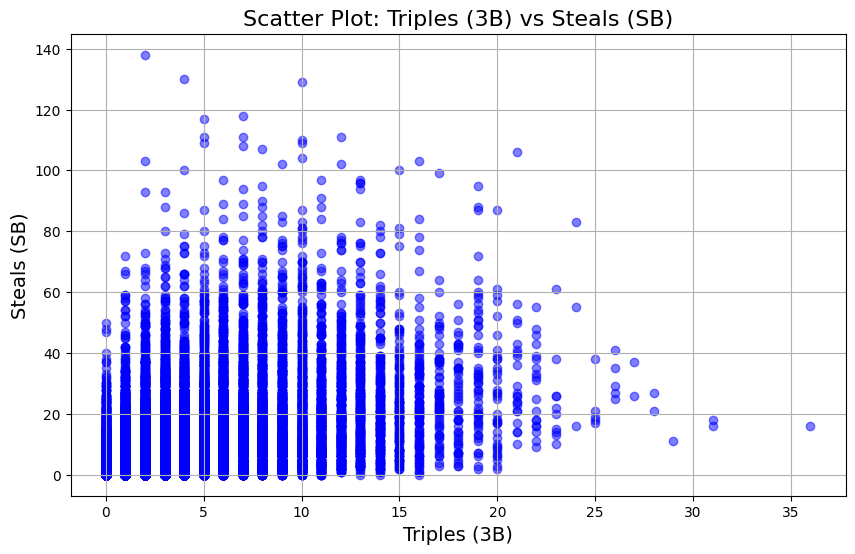

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of Triples (3B) vs Steals (SB)
plt.figure(figsize=(10, 6))

plt.scatter(df_triples_steals['3B'], df_triples_steals['SB'], alpha=0.5, color='b')

# Adding titles and labels
plt.title('Scatter Plot: Triples (3B) vs Steals (SB)', fontsize=16)
plt.xlabel('Triples (3B)', fontsize=14)
plt.ylabel('Steals (SB)', fontsize=14)

plt.grid(True)

plt.show()

In [ ]:
#ADITIONAL QUESTION 1.
#What percentage of players who hit triples also stole bases in a given year?

# Query to get players who hit triples and also stole bases
query = """
SELECT playerID, yearID, `3B`, SB
FROM Batting
WHERE `3B` > 0 AND SB IS NOT NULL
"""
df_triples_steals_players = pd.read_sql_query(query, conn)

In [ ]:
#ADITIONAL QUESTION 1.
#What percentage of players who hit triples also stole bases in a given year?

# Classify players based on whether they also stole bases
df_triples_steals_players['stole_bases'] = df_triples_steals_players['SB'].apply(lambda x: 'Stole Bases' if x > 0 else 'No Steals')

# Count the number of players in each category
category_counts = df_triples_steals_players['stole_bases'].value_counts()


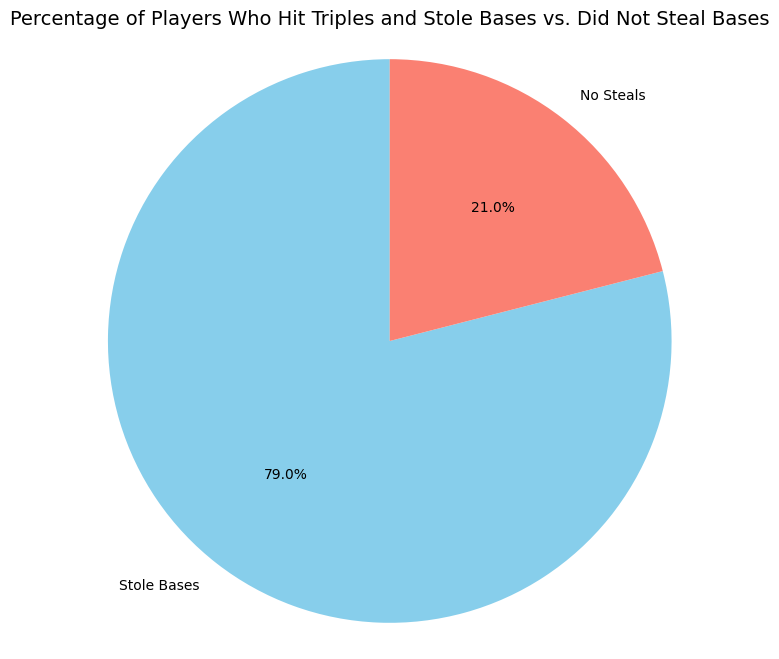

In [ ]:
#ADITIONAL QUESTION 1.
#What percentage of players who hit triples also stole bases in a given year?

import matplotlib.pyplot as plt

# Create a pie chart for the distribution of players who hit triples and stole bases vs. those who did not
plt.figure(figsize=(8, 8))

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])

# Title and display settings
plt.title('Percentage of Players Who Hit Triples and Stole Bases vs. Did Not Steal Bases', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()


In [ ]:
#ADITIONAL QUESTION 2.
#"Is there a correlation between the number of runs a team scores and the number of games they win?"

# Query to retrieve team performance data
query_team = """
SELECT teamID, yearID, W, L, R, G
FROM Teams
"""

df_team = pd.read_sql_query(query_team, conn)

# Display the first 50 rows
df_team.head(50)

,teamID,yearID,W,L,R,G
0,BS1,1871,20,10,401,31
1,CH1,1871,19,9,302,28
2,CL1,1871,10,19,249,29
3,FW1,1871,7,12,137,19
4,NY2,1871,16,17,302,33
5,PH1,1871,21,7,376,28
6,RC1,1871,4,21,231,25
7,TRO,1871,13,15,351,29
8,WS3,1871,15,15,310,32
9,BL1,1872,35,19,617,58


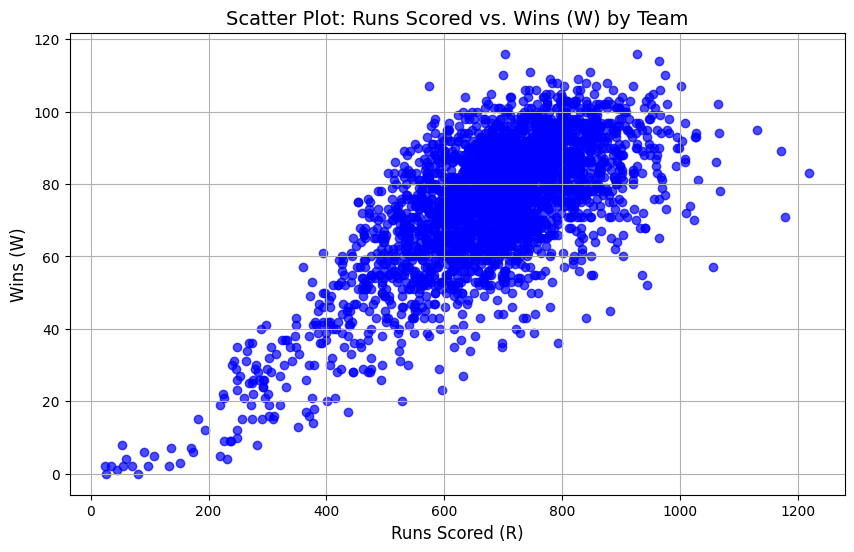

In [ ]:
#ADITIONAL QUESTION 2.
#"Is there a correlation between the number of runs a team scores and the number of games they win?"

import matplotlib.pyplot as plt

query_team = """
SELECT teamID, yearID, W, L, R, G
FROM Teams
"""
df_team = pd.read_sql_query(query_team, conn)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_team['R'], df_team['W'], color='b', alpha=0.7)

# Add labels and title
plt.title('Scatter Plot: Runs Scored vs. Wins (W) by Team', fontsize=14)
plt.xlabel('Runs Scored (R)', fontsize=12)
plt.ylabel('Wins (W)', fontsize=12)

plt.grid(True)
plt.show()


In [ ]:
#ADITIONAL QUESTION 3.
#"Which college produced the most baseball players?"

# Query to find the top 20 colleges with the most players
query_colleges = """
SELECT schoolID, COUNT(playerID) AS num_players
FROM CollegePlaying
GROUP BY schoolID
ORDER BY num_players DESC
LIMIT 20;
"""

# Execute the query
df_colleges = pd.read_sql_query(query_colleges, conn)

# Show the result
df_colleges


,schoolID,num_players
0,texas,265
1,usc,250
2,stanford,248
3,arizonast,236
4,michigan,191
5,ucla,180
6,holycross,167
7,california,162
8,arizona,161
9,alabama,155


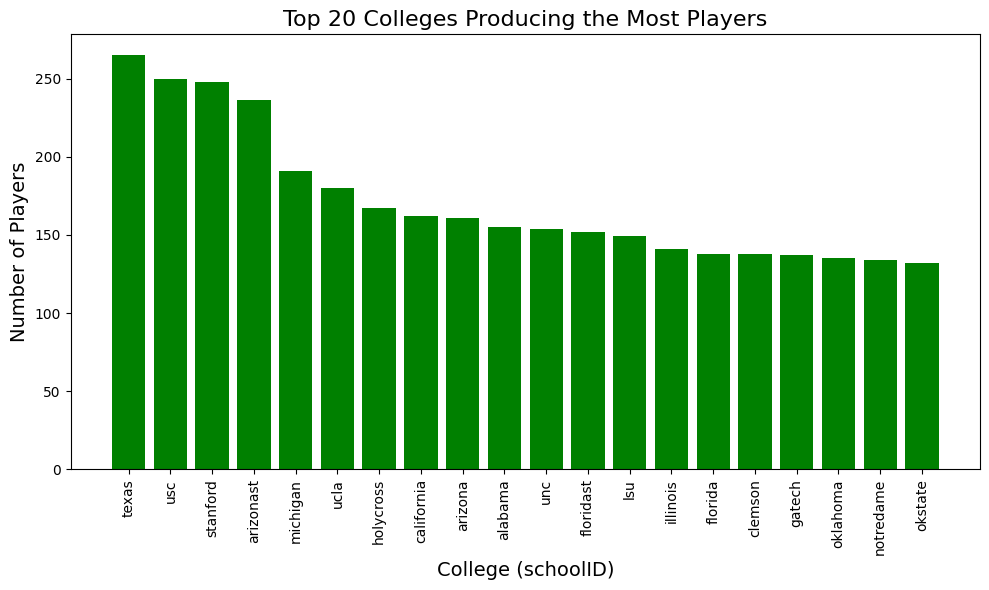

In [ ]:
#ADITIONAL QUESTION 3.
#"Which college produced the most baseball players?"

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df_colleges['schoolID'], df_colleges['num_players'], color='green')

# Adding title and labels
plt.title('Top 20 Colleges Producing the Most Players', fontsize=16)
plt.xlabel('College (schoolID)', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


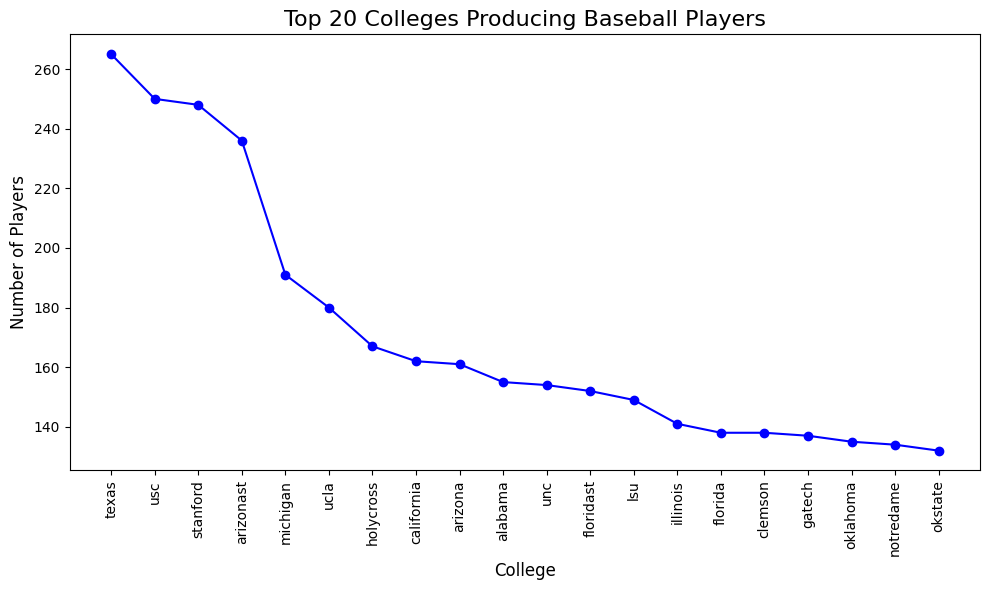

In [ ]:
#ADITIONAL QUESTION 3 with a line plot.
#"Which college produced the most baseball players?"

import matplotlib.pyplot as plt

# Create a line plot for the top 20 colleges with the most players
plt.figure(figsize=(10, 6))

plt.plot(df_colleges['schoolID'], df_colleges['num_players'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Top 20 Colleges Producing Baseball Players', fontsize=16)
plt.xlabel('College', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()
